#Import basic Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Explore the Dataset

In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

## Display basic info

In [ ]:
# read dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# read dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# read first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.Name

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
# Missing Values:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Step 2: Handle Missing Values

In [ ]:
# Age: Fill with median
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-24-dca39f485737>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
# Cabin: Drop due to high missing values
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# Embarked: Fill with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-26-d2c7a8762dc6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
# Verify missing values are handled
print("\nMissing Values After Handling:")
df.isnull().sum()


Missing Values After Handling:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Step 3: Convert Categorical Features to Numerical

In [ ]:
# Label encode 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [ ]:
# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [ ]:
# Drop non-useful columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
# Display dataset after encoding
print("\nDataset After Encoding:")
df.head()


Dataset After Encoding:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


# Step 4: Standardize Numerical Features

In [ ]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Display dataset after standardization
print("\nDataset After Standardization:")
df.head()


Dataset After Standardization:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,0.432793,-0.473674,-0.502445,False,False,True
1,1,1,1,0.663861,0.432793,-0.473674,0.786845,True,False,False
2,1,3,1,-0.258337,-0.474545,-0.473674,-0.488854,False,False,True
3,1,1,1,0.433312,0.432793,-0.473674,0.420730,False,False,True
4,0,3,0,0.433312,-0.474545,-0.473674,-0.486337,False,False,True


# Step 5: Visualize and Remove Outliers

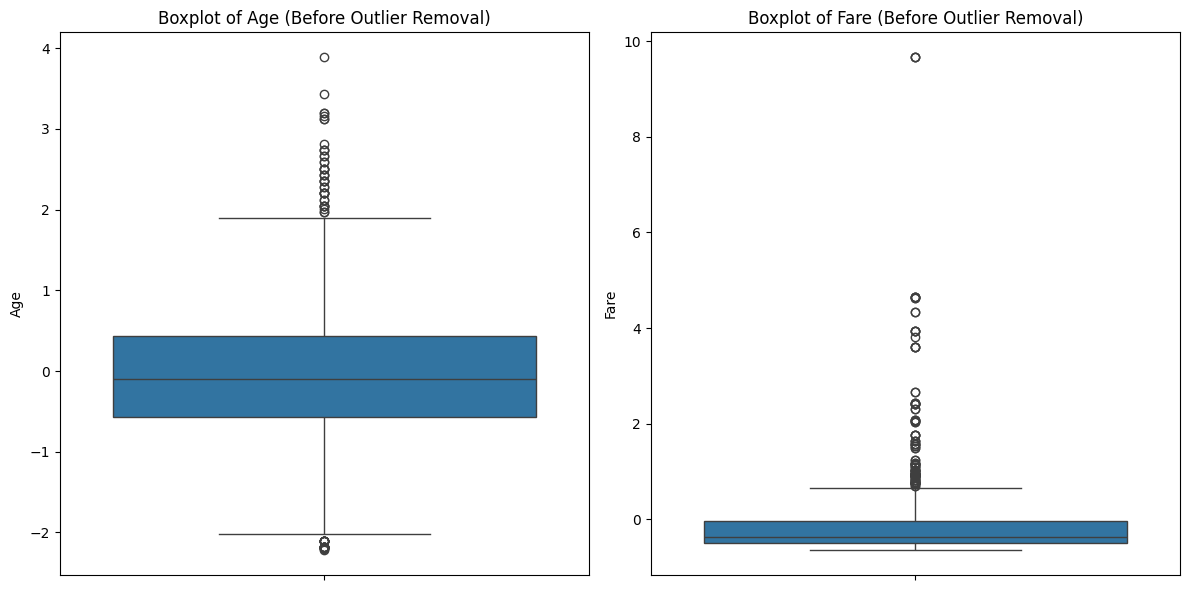

In [ ]:
# Plot boxplots before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age (Before Outlier Removal)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare (Before Outlier Removal)')
plt.tight_layout()
plt.show()

In [ ]:
# Remove outliers using IQR for Age and Fare
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

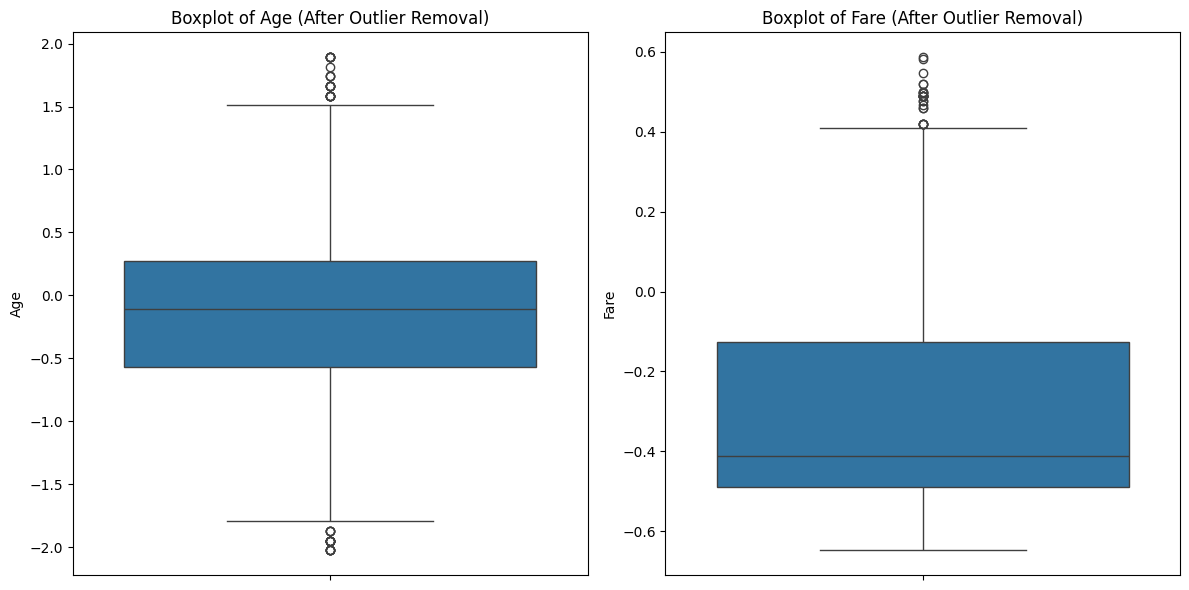

In [ ]:
# Plot boxplots after removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age (After Outlier Removal)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare (After Outlier Removal)')
plt.tight_layout()
plt.show()

# Step 6: Final Dataset

In [ ]:
# Final Preprocessed Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    718 non-null    int64  
 1   Pclass      718 non-null    int64  
 2   Sex         718 non-null    int64  
 3   Age         718 non-null    float64
 4   SibSp       718 non-null    float64
 5   Parch       718 non-null    float64
 6   Fare        718 non-null    float64
 7   Embarked_C  718 non-null    bool   
 8   Embarked_Q  718 non-null    bool   
 9   Embarked_S  718 non-null    bool   
dtypes: bool(3), float64(4), int64(3)
memory usage: 47.0 KB


In [ ]:
# First 5 Rows of Final Dataset:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,0.432793,-0.473674,-0.502445,False,False,True
2,1,3,1,-0.258337,-0.474545,-0.473674,-0.488854,False,False,True
3,1,1,1,0.433312,0.432793,-0.473674,0.420730,False,False,True
4,0,3,0,0.433312,-0.474545,-0.473674,-0.486337,False,False,True
5,0,3,0,-0.104637,-0.474545,-0.473674,-0.478116,False,True,False


# Save the preprocessed dataset

In [ ]:
df.to_csv('/content/Titanic-Preprocessed.csv', index=False)
print("\nPreprocessed dataset saved as 'Titanic-Preprocessed.csv'")


Preprocessed dataset saved as 'Titanic-Preprocessed.csv'
